<a href="https://colab.research.google.com/github/Abhiraj36/HumanEmotionsDetection/blob/main/Human_Emotion_Dataset_Prediction_Using_Tensorfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
muhammadhananasghar_human_emotions_datasethes_path = kagglehub.dataset_download('muhammadhananasghar/human-emotions-datasethes')

print('Data source import complete.')


100%|██████████| 309M/309M [00:14<00:00, 22.1MB/s]

Extracting files...


Data source import complete.


In [6]:
import os

base_path = muhammadhananasghar_human_emotions_datasethes_path
for root, dirs, files in os.walk(base_path):
    print(root)
    break  # just to see the top-level folder


/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4


In [7]:
import os

base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"
for item in os.listdir(base_path):
    print(item)


Emotions Dataset
EmotionsDataset
EmotionsDataset_Splitted


In [9]:
nested_path = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset")
print("Contents of nested folder:")
print(os.listdir(nested_path))


Contents of nested folder:
['test', 'train']


In [14]:
subdirs = ["Emotions Dataset", "EmotionsDataset", "EmotionDataset_Splitted"]
base_path = "/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4"




Contents of Emotions Dataset:

Contents of EmotionsDataset:

Contents of EmotionDataset_Splitted:


# Data Loading

In [2]:
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow.keras.layers import Permute,Dense,Flatten,Conv2D,Resizing,Rescaling,Input,Dropout,InputLayer,MaxPool2D,BatchNormalization,RandomContrast,RandomFlip,RandomRotation,MaxPooling2D,Activation,GlobalAveragePooling2D,Add,Embedding,LayerNormalization,MultiHeadAttention
from tensorflow.keras.regularizers import L2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

In [10]:
train_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "train")
val_directory = os.path.join(base_path, "Emotions Dataset", "Emotions Dataset", "test")

CLASS_NAMES=['angry','happy','sad']

In [12]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
}

In [13]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [15]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 2278 files belonging to 3 classes.


In [16]:
CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
#     "N_EPOCHS": 20,
    "N_EPOCHS": 5,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [17]:
train = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6799 files belonging to 3 classes.


In [18]:
val = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CONFIGURATION["CLASS_NAMES"],
    color_mode='rgb',
    batch_size=1,#CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2278 files belonging to 3 classes.


In [20]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)


Found 6799 files belonging to 3 classes.


In [21]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99
)

Found 2278 files belonging to 3 classes.


# Data Visualization

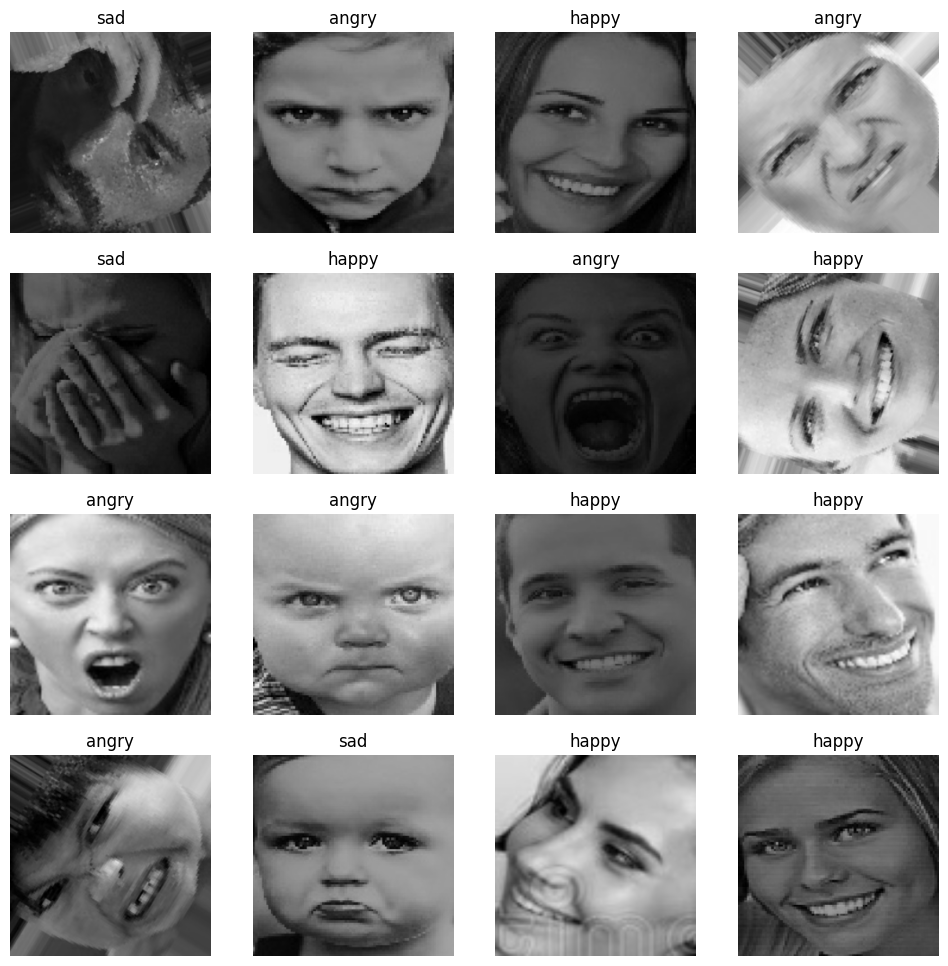

In [23]:
plt.figure(figsize=(12,12))
for images,labels in train_dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255)
        plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0)])
        plt.axis('off')

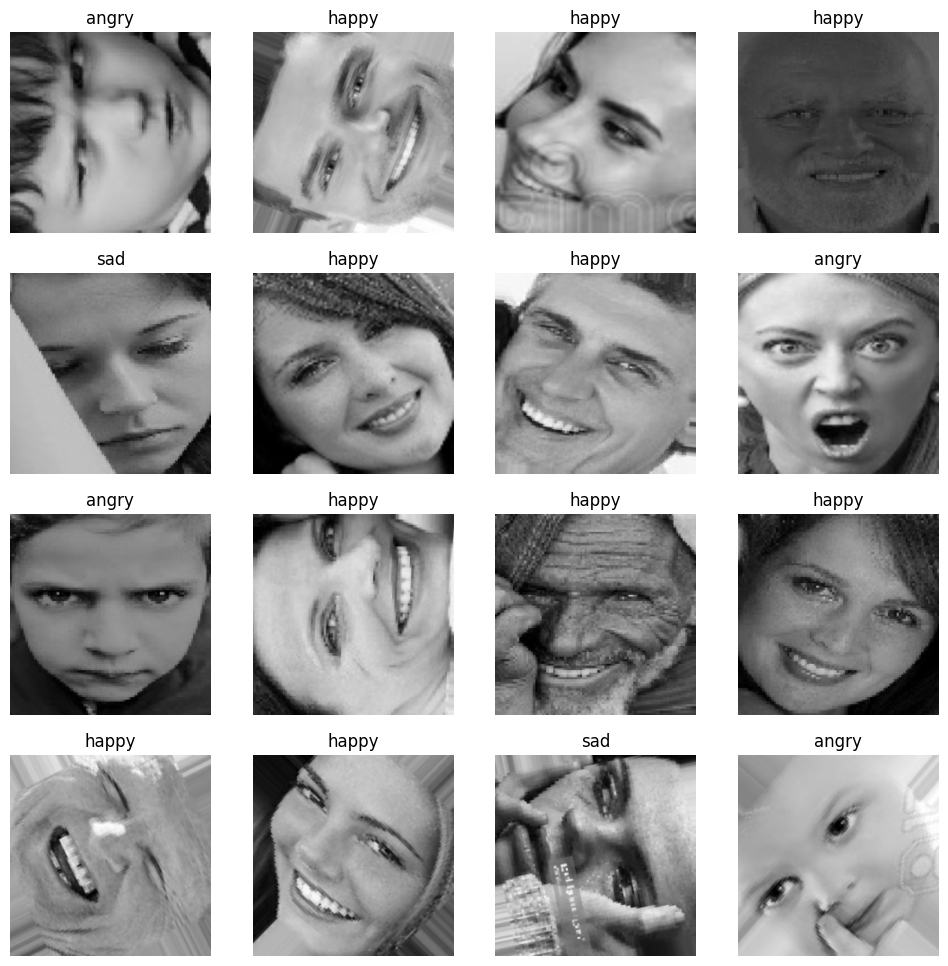

In [24]:
plt. figure(figsize = (12,12))
for images, labels in train_dataset. take (1) :
    for i in range (16):
        ax = plt.subplot(4,4, i+1)
        plt. imshow(images [i]/255)
        plt. title(CLASS_NAMES[tf.argmax(labels[i], axis = 0).numpy ()])
        plt.axis ("off")

# Data Preparation

In [25]:
training_dataset = (
        train_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [26]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [27]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [28]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [29]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

# Modelling

In [30]:
lenet_model = tf.keras.Sequential(
    [
#     InputLayer(input_shape = (None, None, 3), ),

#     resize_rescale_layers,
    InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
    Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

# Training

In [31]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
#loss_function = SparseCategoricalCrossentropy ()

In [ ]:
# y_true = [[0, 1, 0], [0, 9, 1]]
# y_pred = [[0.01,0.05,0.96], [0.1, 0.2, 0.7]]
# # Using 'auto'T'sum_over_batch_size' reduction type.
# cce = tf. keras. losses.CategoricalCrossentropy()
# print (cce(y_true, y_pred). numpy ())

In [32]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [33]:
lenet_model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [34]:
history= lenet_model.fit(
    training_dataset,
    validation_data=val_dataset,
    epochs=CONFIGURATION['N_EPOCHS'],
    verbose=1)

Epoch 1/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.5503 - loss: 1.1708 - top_k_accurcay: 0.8103 - val_accuracy: 0.3323 - val_loss: 1.4081 - val_top_k_accurcay: 0.7739
Epoch 2/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.7570 - loss: 0.5892 - top_k_accurcay: 0.9295 - val_accuracy: 0.5259 - val_loss: 1.2210 - val_top_k_accurcay: 0.8047
Epoch 3/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8776 - loss: 0.3454 - top_k_accurcay: 0.9675 - val_accuracy: 0.7116 - val_loss: 0.8708 - val_top_k_accurcay: 0.9118
Epoch 4/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9249 - loss: 0.2211 - top_k_accurcay: 0.9846 - val_accuracy: 0.6975 - val_loss: 1.2545 - val_top_k_accurcay: 0.9030
Epoch 5/5
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9437 - loss: 0.1666 - top_k_accurcay: 0.9929 - val_accuracy: 0.7090 - val_loss: 1.0419 - val_top_k_accurcay: 0.9074


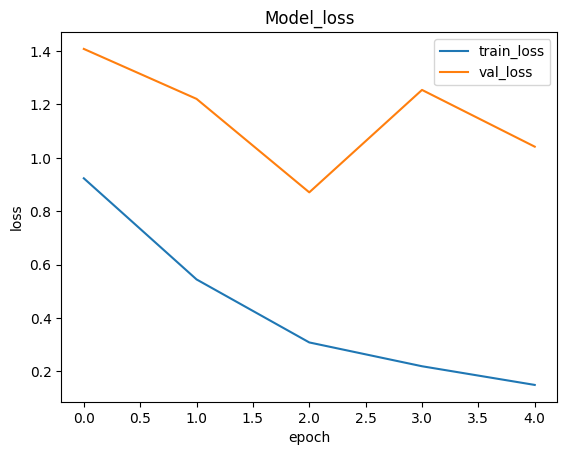

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

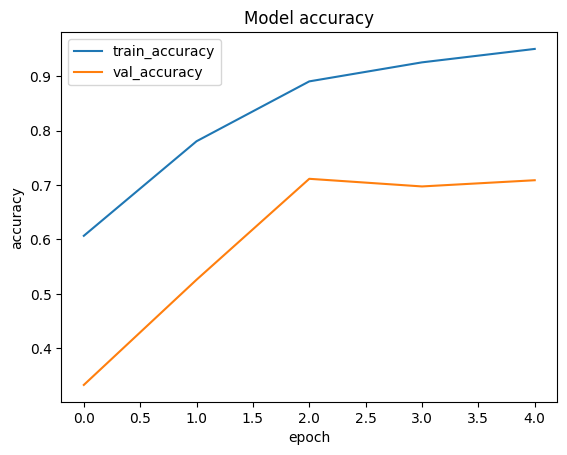

In [36]:
plt. plot (history. history['accuracy'])
plt. plot(history.history[ 'val_accuracy'])
plt. title( 'Model accuracy')
plt. ylabel( 'accuracy')
plt. xlabel( 'epoch')
plt. legend(['train_accuracy', 'val_accuracy'])
plt. show()

# Evalution

In [37]:
lenet_model. evaluate(validation_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6909 - loss: 1.1199 - top_k_accurcay: 0.9002


[1.041908621788025, 0.7089552283287048, 0.907374918460846]

# Testing

In [38]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [41]:
import cv2
import tensorflow as tf

image_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg'
test_image = cv2.imread(image_path)

# Step 1: Check if image was loaded correctly
if test_image is None:
    print("Failed to load image. Please check the path.")
else:
    # Step 2: Resize to model input size
    test_image = cv2.resize(test_image, (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]))

    # Step 3: Convert BGR (OpenCV format) to RGB
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    # Step 4: Normalize and expand dimensions
    im = tf.constant(test_image, dtype=tf.float32) / 255.0
    im = tf.expand_dims(im, axis=0)  # Make it (1, height, width, 3)

    # Step 5: Predict
    prediction = lenet_model(im)
    predicted_class = tf.argmax(prediction, axis=-1).numpy()[0]
    print(f"Predicted Emotion: {CLASS_NAMES[predicted_class]}")


Predicted Emotion: angry


In [43]:
# pred=lenet_model.predict(im)
# print(CONFIGURATION['CLASS_NAMES'][tf.argmax(pred,axis=-1)[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
angry


In [45]:
# test_image = cv2. imread("/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg")
# im = tf. constant(test_image, dtype = tf. float32)
 #im = tf. expand_dims (im, axis = 0)
#print(CLASS_NAMES[tf.argmax(lenet_model(im), axis = -1).numpy() [0]])

angry


In [47]:
CLASS_NAMES=['angry','happy','sad']
test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)

predicted_class_index = tf.argmax(lenet_model(im), axis=-1).numpy()[0]
predicted_class_name = CLASS_NAMES[predicted_class_index]
print(predicted_class_name)


angry


In [ ]:
# plt.figure(figsize = (12,12))

# for images, labels in validation_dataset.take(1):
#   for i in range(16):
#     ax = plt.subplot(4,4, i+1)
#     plt.imshow(images[i]/255.)

#     plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis = -1).numpy()]
#               + "\n" + "Predicted Label - : "
#               + CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis = 0)), axis =-1).numpy()[0])] )
#     plt.axis("off")

angry


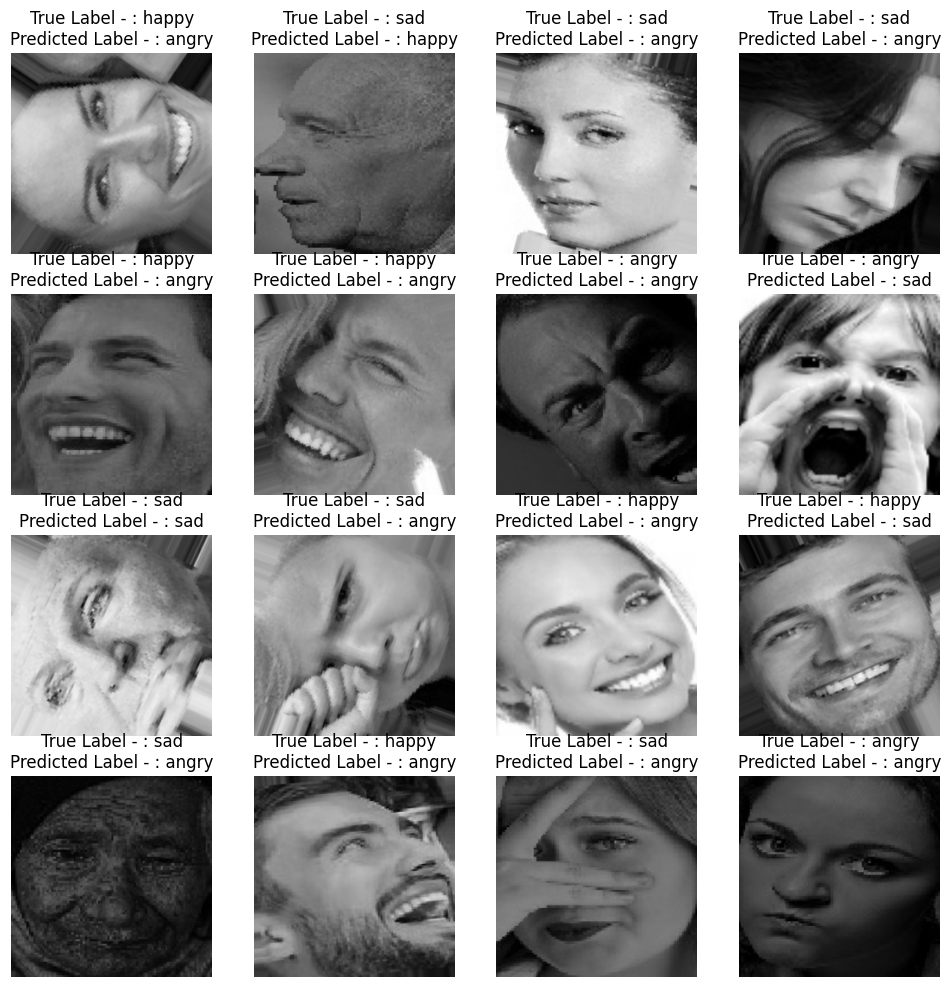

In [48]:
import cv2
import matplotlib.pyplot as plt

test_image = cv2.imread('/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

im = tf.constant(test_image, dtype=tf.float32)
im = tf.expand_dims(im, axis=0)
print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")


# Confusion Matrix

In [49]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append (label.numpy())

In [52]:
#print(labels)

In [ ]:
#print(np.argmax(labels))

In [53]:
print(np.argmax(labels[:2], axis = -1))

[[0 2 1 0 0 2 0 1 1 0 2 1 0 0 2 2 1 2 1 2 2 2 1 1 2 0 1 1 0 2 1 2]
 [1 0 1 2 2 2 1 0 0 1 1 1 1 0 2 0 0 1 0 0 2 2 2 2 2 1 1 1 2 1 1 1]]


In [54]:
print(np.argmax(labels[:2], axis = -1).flatten())

[0 2 1 0 0 2 0 1 1 0 2 1 0 0 2 2 1 2 1 2 2 2 1 1 2 0 1 1 0 2 1 2 1 0 1 2 2
 2 1 0 0 1 1 1 1 0 2 0 0 1 0 0 2 2 2 2 2 1 1 1 2 1 1 1]


In [55]:
print(np.argmax(labels[:-1], axis = -1). flatten())
print(np.argmax(predicted[: -1], axis = -1). flatten ())

[0 2 1 ... 1 0 2]
[0 0 0 ... 0 0 0]


In [56]:
pred = np.argmax(predicted[:-1], axis = -1). flatten ()
lab = np. argmax(labels [: -1], axis = -1).flatten ()

[[390  54  71]
 [767 115 120]
 [599  79  77]]


Text(0.5, 58.7222222222222, 'Predicted')

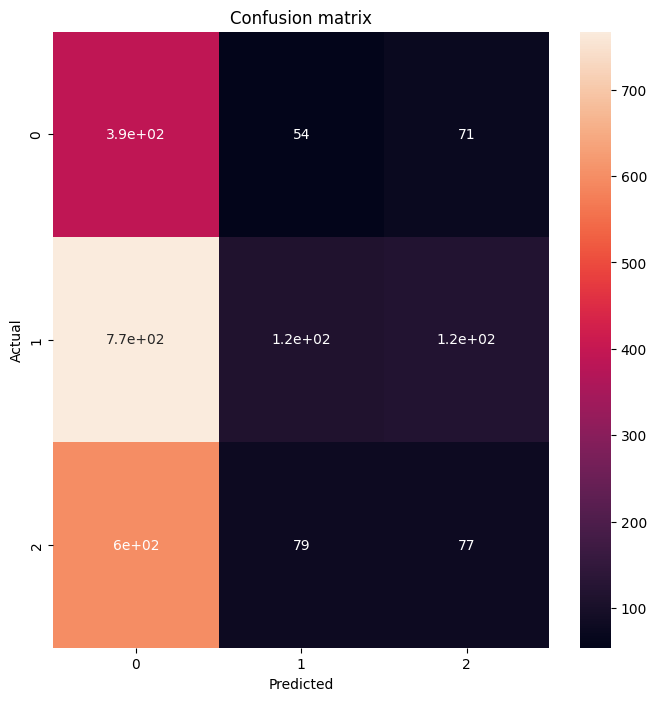

In [57]:
cm = confusion_matrix(lab, pred)
print ( cm)
plt. figure(figsize=(8,8))
sns. heatmap (cm, annot=True,)
plt. title( 'Confusion matrix' )
plt. ylabel( 'Actual')
plt. xlabel ( 'Predicted')

In [58]:
predicted = []
labels = []
for im, label in validation_dataset:
    predicted. append (lenet_model (im))
    labels. append(label. numpy())

In [60]:
 #print (np. concatenate([np.argmax(labels[: -1], axis = -1).flatten(), np.argmax(labels[-1], axis = -1). flatten()])
# print (np.concatenate([np. argmax(predicted[: -1], axis = -1). flatten(), np.argmax(predicted[-1], axis = -1). flatten()])

In [61]:
import numpy as np

labels = np.random.randint(0, 10, size=(5,5))
predicted = np.random.randint(0, 10, size=(5,5))

def fix_concat(labels, predicted):
 return np.concatenate([np.argmax(labels[:-1], axis=-1).flatten(),
                        np.argmax(labels[-1], axis=-1).flatten(),
                        np.argmax(predicted[:-1], axis=-1).flatten(),
                        np.argmax(predicted[-1], axis=-1).flatten()])

result = fix_concat(labels.copy(), predicted.copy())
print(result)


[2 2 0 0 2 3 0 3 2 1]


[[390  54  71]
 [767 115 120]
 [599  79  77]]


Text(0.5, 58.7222222222222, 'Predicted')

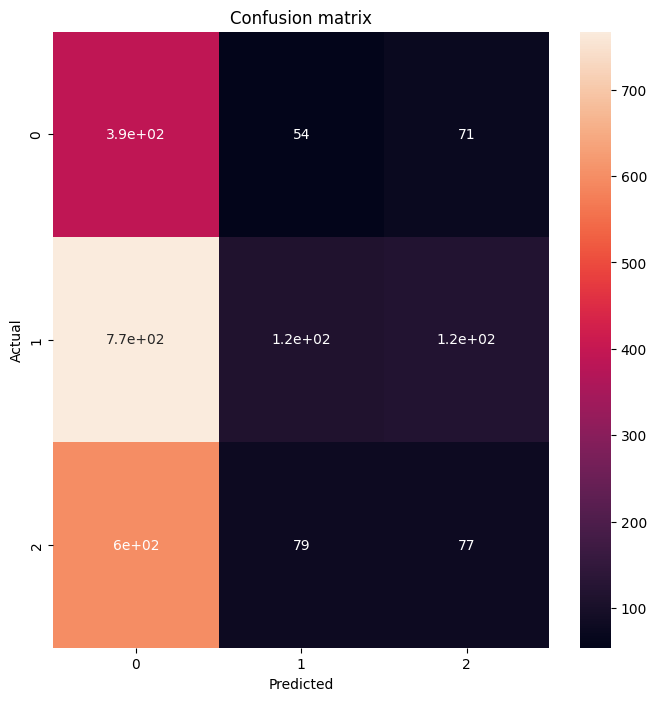

In [62]:
cm = confusion_matrix(lab, pred)
print ( cm)
plt. figure(figsize=(8,8))
sns. heatmap (cm, annot=True,)
plt. title( 'Confusion matrix' )
plt. ylabel( 'Actual')
plt. xlabel ( 'Predicted')

# Data Augmentation

In [63]:
### tf.keras.layer augment
augment_layers = tf.keras.Sequential([
RandomRotation (factor = (0.25, 0.2501), ),
RandomFlip (mode= 'horizontal',),
RandomContrast(factor=0.1),
])

In [64]:
def augment_layer(image, label):
    return augment_layers (image,training = True),

In [65]:
training_dataset = (
    train_dataset
    .map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)


In [66]:
training_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),)>

In [67]:
validation_dataset = (
        val_dataset
        .prefetch(tf.data.AUTOTUNE)
)

In [68]:
validation_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [69]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
            Rescaling(1./255)
])

In [70]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [71]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [73]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [74]:
lenet_model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [78]:
# Example to verify the datasets
print("Training dataset batch shape:", next(iter(training_dataset))[0].shape)
print("Validation dataset batch shape:", next(iter(val_dataset))[0].shape)


Training dataset batch shape: (32, 256, 256, 3)
Validation dataset batch shape: (32, 256, 256, 3)


In [85]:
#if training_dataset is None:
#    print("Training dataset is None.")
#else:
 #   print(f"Training dataset element_spec: {training_dataset.element_spec}")

#if val_dataset is None:
#    print("Validation dataset is None.")
#else:
#   print(f"Validation dataset element_spec: {val_dataset.element_spec}")



Training dataset element_spec: (TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),)
Validation dataset element_spec: (TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))


In [87]:
#history = lenet_model.fit(
#    training_dataset,
#    validation_data=val_dataset,
#    epochs=CONFIGURATION.get('N_EPOCHS', 10),  # Use get() method for safe default
#    verbose=1
#)


In [88]:
lenet_model. evaluate(validation_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2574 - loss: 1.1007 - top_k_accurcay: 0.5721


[1.100912094116211, 0.2502194941043854, 0.5566286444664001]

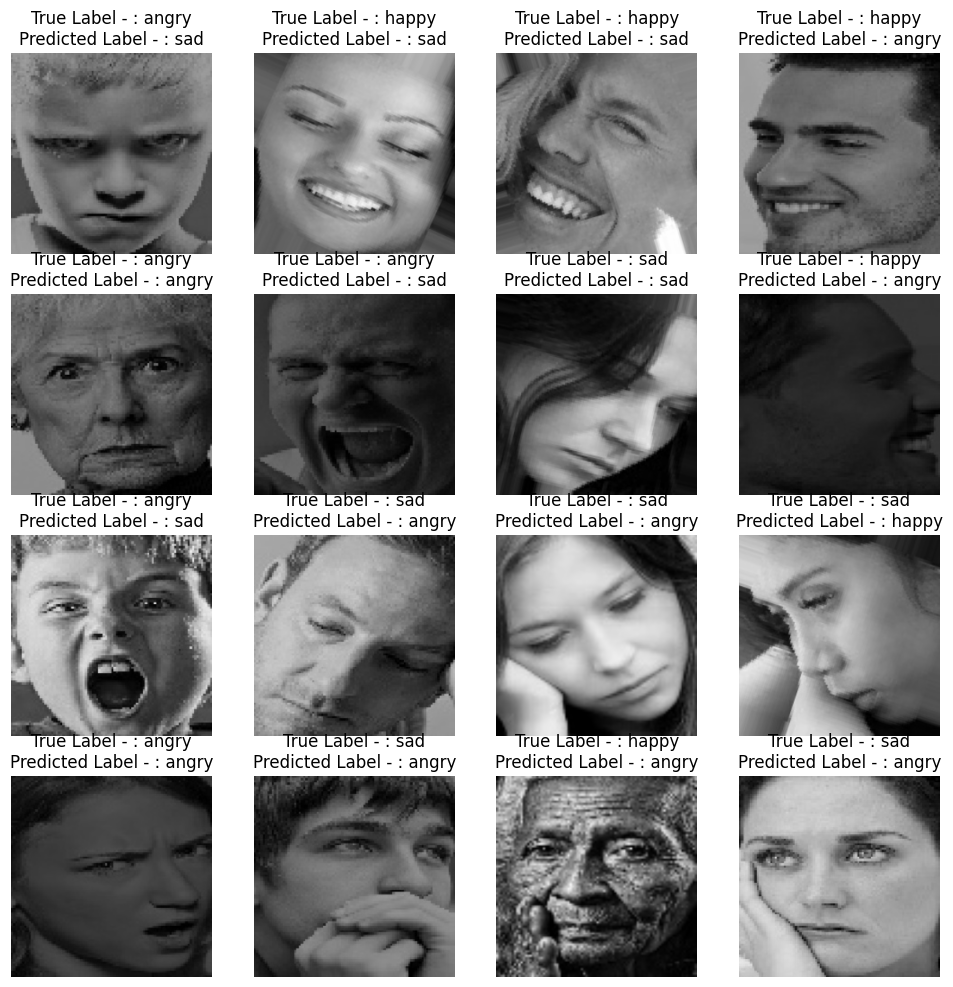

In [89]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# Cutmix Data Augmentation

In [90]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [91]:
def cutmix(train_dataset_1, train_dataset_2):
    (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2
    lamda = tfp.distributions.Beta(2,2)
    lamda = lamda.sample(1)[0]

    r_y, r_x, r_h, r_w = box(lamda)
    crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
    pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
    pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

    image = image_1 - pad_1 + pad_2

    lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
    label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

    return image, label

In [92]:
train_dataset_1 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset_2 = train.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [93]:

# training_dataset = (
#     mixed_dataset
#     .map(cutmix, num_parallel_calls=tf.data.AUTOTUNE)
# #     .prefetch(tf.data.AUTOTUNE)
# )


In [94]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,
#     InputLayer (input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION[ "IM_SIZE"], 3)),
#     Rescaling(1./255, name = "rescaling"),

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

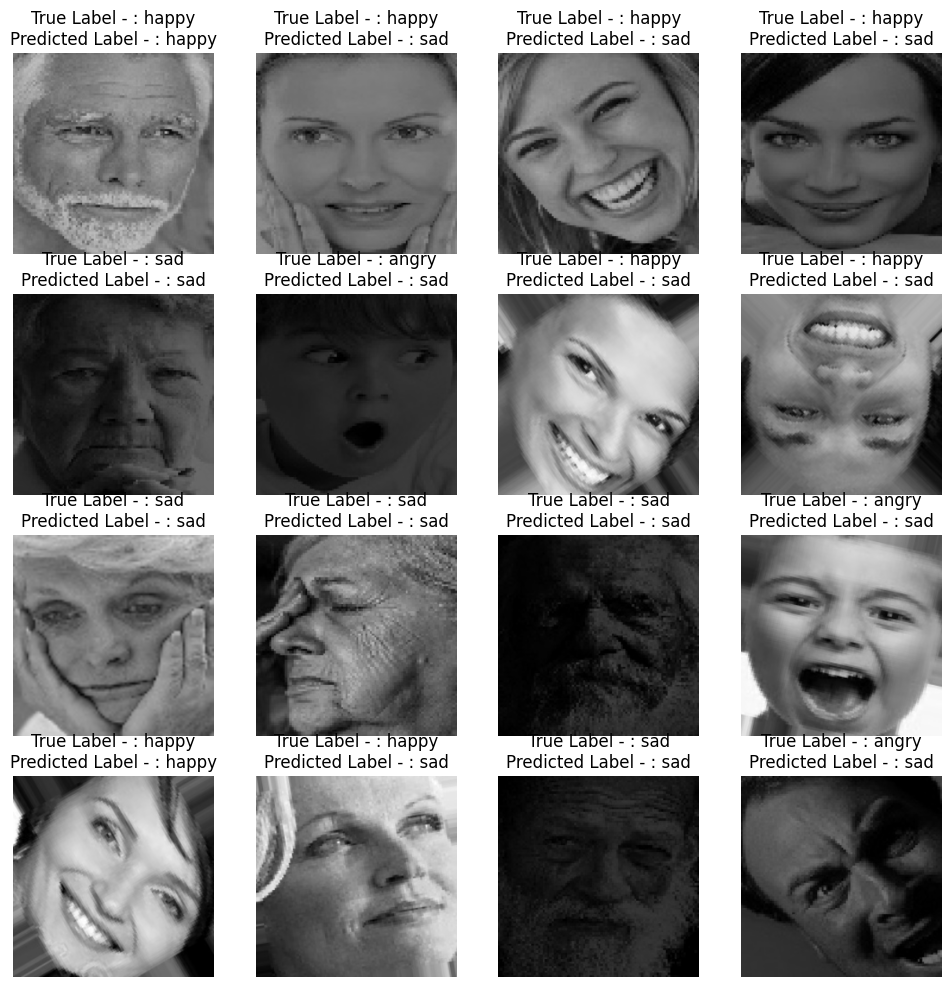

In [95]:
import cv2
import matplotlib.pyplot as plt

# test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# im = tf.constant(test_image, dtype=tf.float32)
# im = tf.expand_dims(im, axis=0)
# print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

plt.figure(figsize=(12, 12))

for images, labels in validation_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255.)

        plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
                  "\n" + "Predicted Label - : " +
                  CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
        plt.axis("off")

# TFRecords

In [96]:
training_dataset = (
training_dataset
.unbatch()
)

In [97]:
validation_dataset = (
validation_dataset
.unbatch()
)

In [98]:
training_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None),)>

In [99]:
validation_dataset

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [100]:
def create_example(image, label):
    bytes_feature = Feature (
        bytes_list=BytesList(value=image))
    int_feature = Feature (
        int64_list=Int64List(value=label))
    example = Example(
        features=Features (feature={
        'images': bytes_feature,
        'labels': int_feature,
}))
    return example.SerializeToString()

In [101]:
NUM_SHARDS=10
PATH='/kaggle/working/shard_{:02d}.tfrecord'

In [102]:
def encode_image(image, label) :
    image = tf. io. encode_peg (image)
    return image, label

In [103]:
def encode_image (image, label):
    image = tf. image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io. encode_jpeg (image)
    return image, label

In [109]:
# encoded_dataset = (
#     training_dataset
#     .map(encode_image)
# )

In [108]:
# for shard_number in range(NUM_SHARDS):
#   sharded_dataset = encoded_dataset.shard(NUM_SHARDS, shard_number).as_numpy_iterator()

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:
#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)


In [107]:
# for shard_number in range(NUM_SHARDS):

#   sharded_dataset = (
#       encoded_dataset
#       .shard(NUM_SHARDS, shard_number)
#       .as_numpy_iterator()
#   )

#   with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
#     for encoded_image, encoded_label in sharded_dataset:

#       example = create_example(encoded_image, encoded_label)
#       file_writer.write(example)

In [104]:
VAL_NUM_SHARDS=3
VAL_PATH='/kaggle/working/val_shard_{:02d}.tfrecord'

In [105]:

encoded_val=(
     validation_dataset
     .map(encode_image)
)

In [106]:

# for shard_number in range(VAL_NUM_SHARDS):
#     sharded_val=(
#         encoded_val
#         .shard(VAL_NUM_SHARDS,shard_number)
#         .as_numpy_iterator()
#    )

#     with tf.io.TFRecordWriter(VAL_PATH.format(shard_number)) as file_writer:
#         for image,label in sharded_val:
#             file_writer.write(create_example(image,label))

In [110]:

recons_dataset = tf.data.TFRecordDataset(
    filenames =[PATH.format(p) for p in range(NUM_SHARDS)] )
recons_val_dataset=tf.data.TFRecordDataset(filenames=[VAL_PATH.format(p) for p in range(VAL_NUM_SHARDS)])

In [111]:
def parse_tfrecords(example):

    feature_description = {
          "images": tf.io.FixedLenFeature([], tf.string),
          "labels": tf.io.FixedLenFeature([], tf.int64),
      }

    example = tf.io.parse_single_example(example, feature_description)
    example["images"] = tf.image.convert_image_dtype(tf.io.decode_jpeg(example["images"],channels=3), dtype=tf.float32)

    return example["images"], example["labels"]


In [112]:

parsed_dataset = (
    recons_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [113]:
val_parsed_dataset= (
    recons_val_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
# plt.figure(figsize=(12,12))
# for images,labels in val_parsed_dataset.take(1):
#     for i in range(16):
#         ax=plt.subplot(4,4,i+1)
#         plt.imshow(images[i])
#         plt.title(CLASS_NAMES[(labels[i])])
#         plt.axis('off')

In [114]:
resize_rescale_layers=tf.keras.Sequential([
            Resizing(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']),
])

In [115]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3) ),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 254, 254, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 127, 127, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 125, 125, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1024)           │    62,981,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

In [116]:
loss_function=tf.keras.losses.SparseCategoricalCrossentropy()
metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
lenet_model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [118]:

# history= lenet_model.fit(
     #parsed_dataset,
    # validation_data=val_parsed_dataset,
     #epochs=CONFIGURATION['N_EPOCHS'],
    # verbose=1)

In [ ]:
# import cv2
# import matplotlib.pyplot as plt

# # test_image = cv2.imread('/kaggle/input/human-emotions-datasethes/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')

# # im = tf.constant(test_image, dtype=tf.float32)
# # im = tf.expand_dims(im, axis=0)
# # print(CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]])

# plt.figure(figsize=(12, 12))

# for images, labels in validation_dataset.take(1):
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i] / 255.)

#         plt.title("True Label - : " + CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=-1).numpy()] +
#                   "\n" + "Predicted Label - : " +
#                   CONFIGURATION["CLASS_NAMES"][int(tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0])])
#         plt.axis("off")

# Custom Conv2D

In [132]:
class CustomConv2D(Layer):
  def __init__(self, n_filters, kernel_size, n_strides, padding = 'valid'):
    super(CustomConv2D, self).__init__(name = 'custom_conv2d')

    self.conv = Conv2D(
        filters = n_filters,
        kernel_size = kernel_size,
        activation = 'relu',
        strides = n_strides,
        padding = padding)

    self.batch_norm = BatchNormalization()

  def call(self, x, training = True):

    x = self.conv(x)
    x = self.batch_norm(x, training)

    return x

# Residual Block

In [133]:
class ResidualBlock(Layer):
  def __init__(self, n_channels, n_strides = 1):
    super(ResidualBlock, self).__init__(name = 'res_block')

    self.dotted = (n_strides != 1)

    self.custom_conv_1 = CustomConv2D(n_channels, 3, n_strides, padding = "same")
    self.custom_conv_2 = CustomConv2D(n_channels, 3, 1, padding = "same")

    self.activation = Activation('relu')

    if self.dotted:
      self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)

  def call(self, input, training=True):

    x = self.custom_conv_1(input, training)
    x = self.custom_conv_2(x, training)

    if self.dotted:
      x_add = self.custom_conv_3(input, training)
      x_add = Add()([x, x_add])
    else:
      x_add = Add()([x, input])

    return self.activation(x_add)

# Complete Network

In [134]:
class ResNet34(tf.keras.Model):
    def __init__(self):
        super(ResNet34, self).__init__(name='resnet_34')

        self.conv_1 = CustomConv2D(64, 7, 2, padding='same')
        self.max_pool = tf.keras.layers.MaxPooling2D(3, 2)

        self.conv_2_1 = ResidualBlock(64)
        self.conv_2_2 = ResidualBlock(64)
        self.conv_2_3 = ResidualBlock(64)

        self.conv_3_1 = ResidualBlock(128, 2)
        self.conv_3_2 = ResidualBlock(128)
        self.conv_3_3 = ResidualBlock(128)
        self.conv_3_4 = ResidualBlock(128)

        self.conv_4_1 = ResidualBlock(256, 2)
        self.conv_4_2 = ResidualBlock(256)
        self.conv_4_3 = ResidualBlock(256)
        self.conv_4_4 = ResidualBlock(256)
        self.conv_4_5 = ResidualBlock(256)
        self.conv_4_6 = ResidualBlock(256)

        self.conv_5_1 = ResidualBlock(512, 2)
        self.conv_5_2 = ResidualBlock(512)
        self.conv_5_3 = ResidualBlock(512)

        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()

        self.fc_3 = tf.keras.layers.Dense(CONFIGURATION["NUM_CLASSES"], activation='softmax')

    def call(self, x, training=True):
        x = self.conv_1(x, training=training)
        x = self.max_pool(x)

        x = self.conv_2_1(x, training=training)
        x = self.conv_2_2(x, training=training)
        x = self.conv_2_3(x, training=training)

        x = self.conv_3_1(x, training=training)
        x = self.conv_3_2(x, training=training)
        x = self.conv_3_3(x, training=training)
        x = self.conv_3_4(x, training=training)

        x = self.conv_4_1(x, training=training)
        x = self.conv_4_2(x, training=training)
        x = self.conv_4_3(x, training=training)
        x = self.conv_4_4(x, training=training)
        x = self.conv_4_5(x, training=training)
        x = self.conv_4_6(x, training=training)

        x = self.conv_5_1(x, training=training)
        x = self.conv_5_2(x, training=training)
        x = self.conv_5_3(x, training=training)

        x = self.global_pool(x)

        return self.fc_3(x)


In [123]:
# checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
#         '/kaggle/working/',
#         monitor='val_accuracy',
#         mode='max',
#         verbose=1,
#         save_best_only=True
# )

In [136]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [137]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy')]

In [138]:
resnet_34.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [139]:
#history=resnet_34.fit(train,validation_data=val, epochs=CONFIGURATION['N_EPOCHS'],verbose=1)

# Transfer Learning EfficientNetB4

In [140]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(
    include_top = False,
    weights='imagenet',
    input_shape=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3),
    )

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [141]:
backbone.trainable = False

In [142]:
pretrained_model = tf.keras.Sequential([
    Input(shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"],3)),
    backbone,
    GlobalAveragePooling2D(),
    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu"),
    BatchNormalization(),
    Dense( CONFIGURATION["N_DENSE_2"], activation = "relu"),
    Dense( CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

    ])
pretrained_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)     │ (None, 8, 8, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1024)           │     1,836,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_132         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 1,969,667 (7.51 MB)

 Non-trainable params: 17,675,871 (67.43 MB)

In [143]:
loss_function=tf.keras.losses.CategoricalCrossentropy()

In [144]:
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [145]:
pretrained_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=CONFIGURATION['LEARNING_RATE']),
                    loss=loss_function,
                    metrics=metrics
                                    )

In [ ]:
# pretrained_model.fit(
#         train,
#         validation_data=val,
#         epochs=CONFIGURATION['N_EPOCHS'],
#         verbose=1
# )

# ViT model from scratch

In [152]:
import os

# Define the correct path to the dataset
dataset_path = '/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/'

# Check if the directory exists and list the files
if os.path.exists(dataset_path):
    files = os.listdir(dataset_path)
    print(files)
else:
    print("Dataset path does not exist.")



['Emotions Dataset', 'EmotionsDataset', 'EmotionsDataset_Splitted']


In [154]:
test_image=cv2.imread(r'/root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4/Emotions Dataset/Emotions Dataset/train/happy/100711.jpg')
test_image=cv2.resize(test_image,(CONFIGURATION['IM_SIZE'],CONFIGURATION['IM_SIZE']))

In [155]:
class PatchEncoder(Layer):
    def __init__(self,N_PATCHES,HIDDEN_SIZE):
        super(PatchEncoder,self).__init__(name='patch_encoder')
        self.N_PATCHES=N_PATCHES
        self.linear_projection=Dense(HIDDEN_SIZE)
        self.positional_embedding=Embedding(N_PATCHES,HIDDEN_SIZE)

    def call(self,x):
        patches=tf.image.extract_patches(images=x,
                                 sizes=[1,16,16,1],
                                 strides=[1,16,16,1],
                                 rates=[1,1,1,1],
                                 padding='VALID'
                    )

        patches=tf.reshape(patches, (tf.shape(patches)[0],-1,patches.shape[-1]))

        embedding_input=tf.range(start=0,limit=self.N_PATCHES,delta=1)

        output=self.linear_projection(patches)+self.positional_embedding(embedding_input)

        return output

In [156]:
class TransformerEncoder(Layer):
    def __init__(self,N_HEADS,HIDDEN_SIZE):
        super(TransformerEncoder,self).__init__(name='transformer_encoder')

        self.layer_norm_1=LayerNormalization()
        self.layer_norm_2=LayerNormalization()

        self.multi_head_attention=MultiHeadAttention(N_HEADS,HIDDEN_SIZE)

        self.dense_1=Dense(HIDDEN_SIZE,activation=tf.nn.gelu)
        self.dense_2=Dense(HIDDEN_SIZE,activation=tf.nn.gelu)

    def call(self,input):
        x_1=self.layer_norm_1(input)
        x_1=self.multi_head_attention(x_1,x_1)

        x_1=Add()([x_1,input])

        x_2=self.layer_norm_2(x_1)
        x_2=self.dense_1(x_2)
        output=self.dense_2(x_2)

        output=Add()([output,x_1])

        return output

In [157]:
class ViT(Model):
    def __init__(self,N_HEADS,HIDDEN_SIZE,N_PATCHES,N_LAYERS,N_DENSE_UNITS):
        super(ViT,self).__init__(name='ViT_Model')
        self.N_LAYERS=N_LAYERS
        self.patch_encoder = PatchEncoder(N_PATCHES, HIDDEN_SIZE)
        self.trans_encoder= [TransformerEncoder(N_HEADS,HIDDEN_SIZE) for _ in range(N_LAYERS)]
        self.dense_1=Dense(N_DENSE_UNITS,activation=tf.nn.gelu)
        self.dense_2=Dense(N_DENSE_UNITS,activation=tf.nn.gelu)
        self.dense_3=Dense(CONFIGURATION['NUM_CLASSES'],activation='softmax')


    def call(self,input):
        x = self.patch_encoder(input)

        for i in range(self.N_LAYERS):
            x=self.trans_encoder[i](x)

        x=Flatten()(x)

        x=self.dense_1(x)
        x=self.dense_2(x)

        output=self.dense_3(x)

        return output

In [163]:
vit = ViT(
    N_HEADS = 4, HIDDEN_SIZE = 768, N_PATCHES = 256,
    N_LAYERS = 2, N_DENSE_UNITS = 128
)
vit(tf.zeros([32, 256, 256, 3]))

vit.summary()


Model: "ViT_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ patch_encoder (PatchEncoder)    │ ?                      │       787,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder             │ ?                      │    10,631,424 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (32, 128)              │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (32, 128)              │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (32, 3)                │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,232,899 (180.18 MB)

 Trainable params: 47,232,899 (180.18 MB)

 Non-trainable params: 0 (0.00 B)

# HuggingFace ViT

In [164]:

resize_rescale_hf=tf.keras.Sequential([
        Resizing(224,224),
        Rescaling(1./255),
        Permute((3,1,2))
])

In [167]:
# from transformers import TFViTModel,ViTFeatureExtractor

#  base_model=TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# inputs=Input(shape=(256,256,3))
# x=resize_rescale_hf(inputs)
# x=base_model(x)[0][:,0,:]

 #output=Dense(CONFIGURATION['NUM_CLASSES'],activation='softmax')(x)
 #model=tf.keras.Model(inputs=inputs,outputs=output)

In [169]:
# model.summary()

In [168]:
loss_function=tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy'),tf.keras.metrics.TopKCategoricalAccuracy(k=2,name='top_k_accurcay')]

In [170]:
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [171]:
#model.fit(train,validation_data=val,epochs=3,verbose=1)

## Using WandB with ViT

In [174]:
!pip uninstall wandb -y
!pip install wandb


import wandb

from wandb.keras import WandbCallback
from tensorflow.keras.callbacks import Callback

Found existing installation: wandb 0.19.9
Uninstalling wandb-0.19.9:
  Successfully uninstalled wandb-0.19.9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 89.1 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'wandb.keras'

In [ ]:
#wandb.login()

In [ ]:
wandb.init(project='Emotion-Detection')

In [ ]:

wandb.config={"BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 5e-5,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
             }

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)

In [ ]:
history=model.fit(train,validation_data=val,epochs=3,verbose=1,callbacks=[WandbCallback()])

In [ ]:
lass LogConfMatrix(Callback):
    def on_epoch_end(self,epoch,logs):
        predicted=[]
        labels=[]

        for im,label in val:
            predicted.append(model(im))
            labels.append(label.numpy())
        pred=np.concatenate([np.argmax(predicted[:-1],axis=-1).flatten(),np.argmax(predicted[-1],axis=-1)])
        lab=np.concatenate([np.argmax(labels[:-1],axis=-1).flatten(),np.argmax(labels[-1],axis=-1)])

        cm=wandb.plot.confusion_matrix(
            y_true=lab,
            preds=pred,
            class_names=CONFIGURATION['CLASS_NAMES']
        )
        wandb.log({'conf_mat':cm})


In [ ]:
class LogResultsTable(Callback):
    def on_epoch_end(self,epoch,logs):
        columns=['Image','Predicted','Label']

        val_table=wandb.Table(columns=columns)
        for im,label in val.take(100):

            pred=CONFIGURATION['CLASS_NAMES'][tf.argmax(model(im),axis=-1).numpy()[0]]
            lab=CONFIGURATION['CLASS_NAMES'][tf.argmax(label,axis=-1).numpy()[0]]
            row=[wandb.Image(im),pred,lab]

            val_table.add_data(*row)

        wandb.log({'Model Results':val_table})



In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),loss=loss_function,metrics=metrics)
history=model.fit(train,validation_data=val,epochs=3,verbose=1,callbacks=[WandbCallback(),LogConfMatrix(),LogResultsTable()])